In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Loading Data

In [2]:
url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749'
df = pd.read_csv(url, sep=',')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# Basic Analysis

In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 41.7 KB


In [4]:
df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


In [5]:
# From above, we can make the following columns as categories and continuous variables

# Categorical
# Product - Category
# Gender - Category
# MaritalStatus - Category
# Fitness - Ordinal (1 < 2 < 3 < 4 < 5)

# Continuous
# Age - Continuous
# Education - Continuous
# Usage - discrete or Continuous
# Income - Continuous
# Miles - COntinuous


# Doing data type transformations
df = df.astype({'Product': 'category', 'Gender': 'category', 'MaritalStatus': 'category'})

df['Fitness'] = pd.Categorical(df['Fitness'], categories=[1, 2, 3, 4, 5], ordered=True) # Ordinal

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 8.8 KB


The memory drastically reduced my 41.7 Kb to 8.8 Kb. it reduced by 78.65%. It is a huge decrease in memory usage. This will be more pronounced if the dataset is huge

In [6]:
print(f'The count of rows in the dataset is {df.shape[0]}')
print(f'The count of columns in the dataset is {df.shape[1]}')

The count of rows in the dataset is 180
The count of columns in the dataset is 9


# Missing Value & Outliers

In [7]:
print(df.isnull().sum())
print(f'The number of missing values in the dataset is {df.isna().sum().sum()}')

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64
The number of missing values in the dataset is 0


No need to do any imputation as there are no NULL values

In [8]:
df.describe()

,Age,Education,Usage,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,53719.577778,103.194444
std,6.943498,1.617055,1.084797,16506.684226,51.863605
min,18.000000,12.000000,2.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,104581.000000,360.000000


We know that mean gets affected by outliers while median doesn't. So we can understand presence of outliers based on these two values as shown below.

In [9]:
for column in df.select_dtypes(include='number').columns:
    if df[column].mean() > df[column].median():
        print(f'{column} has outliers on the higher side')
    elif df[column].mean() < df[column].median():
        print(f'{column} has outliers on the lower side')
    else:
        print(f'{column} does not have outliers')

# We could verify the same in box plot below

Age has outliers on the higher side
Education has outliers on the lower side
Usage has outliers on the higher side
Income has outliers on the higher side
Miles has outliers on the higher side


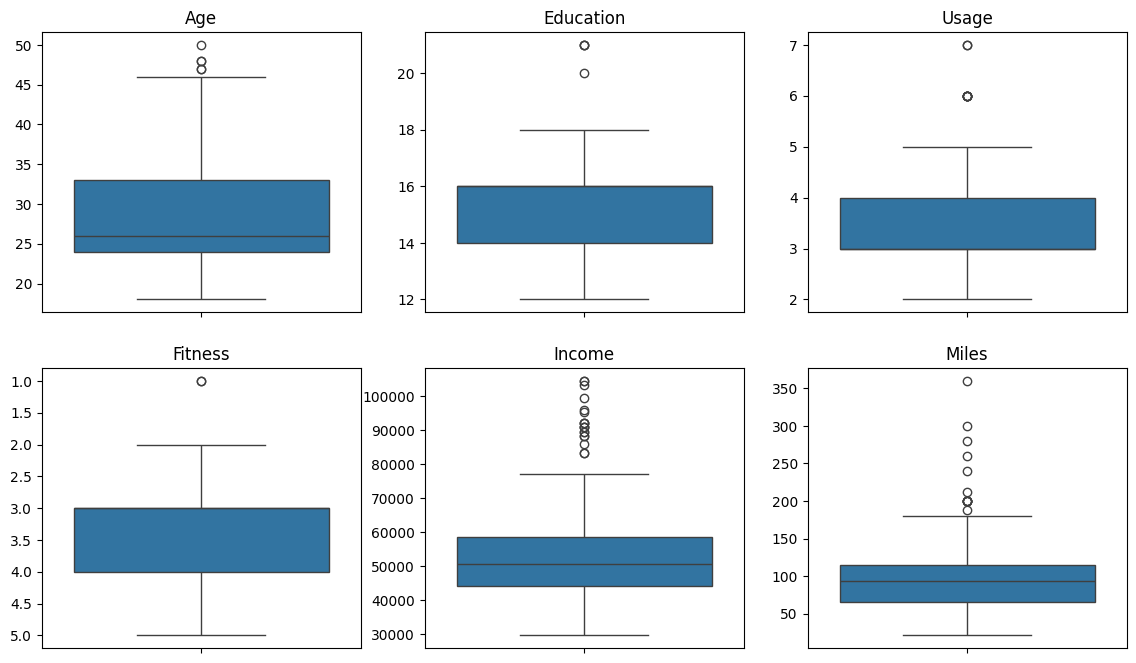

In [10]:
# Set the figure size
plt.figure(figsize=(14, 8))  # Create a larger figure to fit all subplots comfortably

# First subplot for Age
plt.subplot(2, 3, 1)  # Create the first subplot in a 2x3 grid (row 1, column 1)
sns.boxplot(df['Age'])  # Plot the boxplot for the 'Age' column
plt.title('Age')  # Set the title for the subplot
plt.ylabel('')  # Remove the y-axis label

# Second subplot for Education
plt.subplot(2, 3, 2)  # Second subplot (row 1, column 2)
sns.boxplot(df['Education'])  # Plot the boxplot for the 'Education' column
plt.title('Education')  # Set the title for the subplot
plt.ylabel('')  # Remove the y-axis label

# Third subplot for Usage
plt.subplot(2, 3, 3)  # Third subplot (row 1, column 3)
sns.boxplot(df['Usage'])  # Plot the boxplot for the 'Usage' column
plt.title('Usage')  # Set the title for the subplot
plt.ylabel('')  # Remove the y-axis label

# Fourth subplot for Fitness
plt.subplot(2, 3, 4)  # Fourth subplot (row 2, column 1)
sns.boxplot(df['Fitness'])  # Plot the boxplot for the 'Fitness' column
plt.title('Fitness')  # Set the title for the subplot
plt.ylabel('')  # Remove the y-axis label

# Fifth subplot for Income
plt.subplot(2, 3, 5)  # Fifth subplot (row 2, column 2)
sns.boxplot(df['Income'])  # Plot the boxplot for the 'Income' column
plt.title('Income')  # Set the title for the subplot
plt.ylabel('')  # Remove the y-axis label

# Sixth subplot for Miles
plt.subplot(2, 3, 6)  # Sixth subplot (row 2, column 3)
sns.boxplot(df['Miles'])  # Plot the boxplot for the 'Miles' column
plt.title('Miles')  # Set the title for the subplot
plt.ylabel('')  # Remove the y-axis label

plt.show()  # Display the final figure with all subplots


we could see outliers in all 6 numerical variables. No of outliers is very low for all 6 vindependent variables. So we need not remove them.

Note that the median (50%) consides with 25% or 75% for the plots Fitness, Education and Fitness column

In [11]:
df.describe(include='category')

,Product,Gender,MaritalStatus,Fitness
count,180,180,180,180
unique,3,2,2,5
top,KP281,Male,Partnered,3
freq,80,104,107,97


# Non Graphical Analysis

In [12]:
cols = ['Product', 'Gender', 'MaritalStatus', 'Fitness', 'Education', 'Usage']
for col in cols:
    display(df[col].value_counts())
    print('\n','*'*50)

,count
Product,
KP281,80
KP481,60
KP781,40



 **************************************************


,count
Gender,
Male,104
Female,76



 **************************************************


,count
MaritalStatus,
Partnered,107
Single,73



 **************************************************


,count
Fitness,
3,97
5,31
2,26
4,24
1,2



 **************************************************


,count
Education,
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1



 **************************************************


,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2



 **************************************************


# Graphical Analysis

In [13]:
# Helper function
def count_plot(data, x=None, y=None, hue=None, title='', xlabel='', ylabel='', figsize=(8, 6), palette='Set1'):
    """
    Creates a count plot using Seaborn with customizable parameters.

    Parameters:
    - data: DataFrame containing the data to plot.
    - x: Column name for the x-axis.
    - y: Column name for the y-axis (not used in count plots).
    - hue: Column name for hue differentiation.
    - title: Title of the plot.
    - xlabel: Label for the x-axis.
    - ylabel: Label for the y-axis.
    - figsize: Tuple specifying the figure size (default is (8, 6)).
    - palette: Color palette to use (default is 'Set1').
    """
    # Set the figure size
    plt.figure(figsize=figsize)

    # Create the count plot with specified parameters
    ax = sns.countplot(x=x, data=data, hue=hue, palette=palette, linewidth=2.5)

    for container in ax.containers:
        ax.bar_label(container)


    # Add titles and axis labels
    plt.title(title, fontsize=16, fontweight='bold', fontfamily='Serif')
    plt.xlabel(xlabel, fontsize=12, fontweight='bold')
    plt.ylabel(ylabel, fontsize=12, fontweight='bold')

    # Adjust tick label sizes for better readability
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Show legend if hue is specified
    if hue is not None:
        plt.legend(frameon=False, loc='best')

    # Optimize layout for better spacing
    plt.tight_layout()

    # Display the plot
    plt.show()

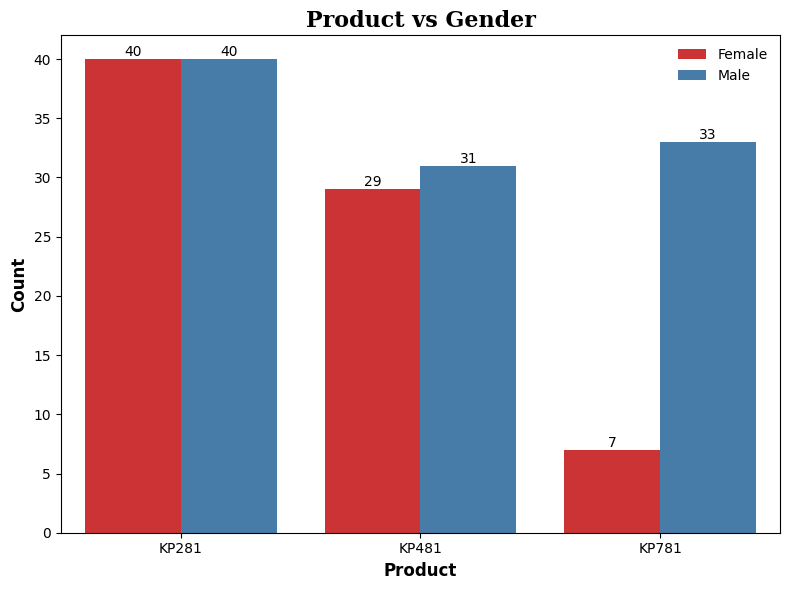

In [14]:
# Count plot
count_plot(data=df, x='Product', hue='Gender', title='Product vs Gender', xlabel='Product', ylabel='Count')

---
## Insights
* The products KP281 and KP481 are fairly equally chosen by both genders.
* The product KP781 is highly preferred by males compared to females.
---

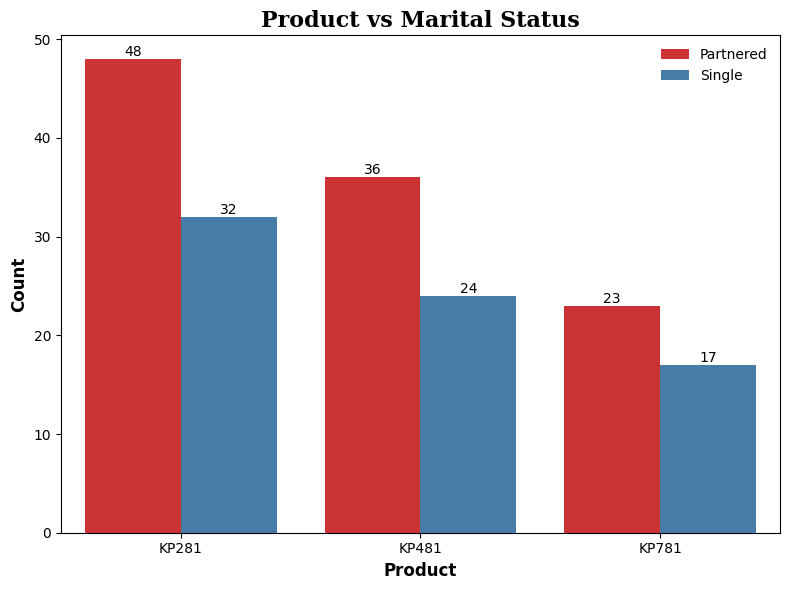

In [15]:
count_plot(data=df, x='Product', hue='MaritalStatus', title='Product vs Marital Status', xlabel='Product', ylabel='Count')

---
## Insights
* Partnered/Married people purchased more treadmills as compare to single people.
---

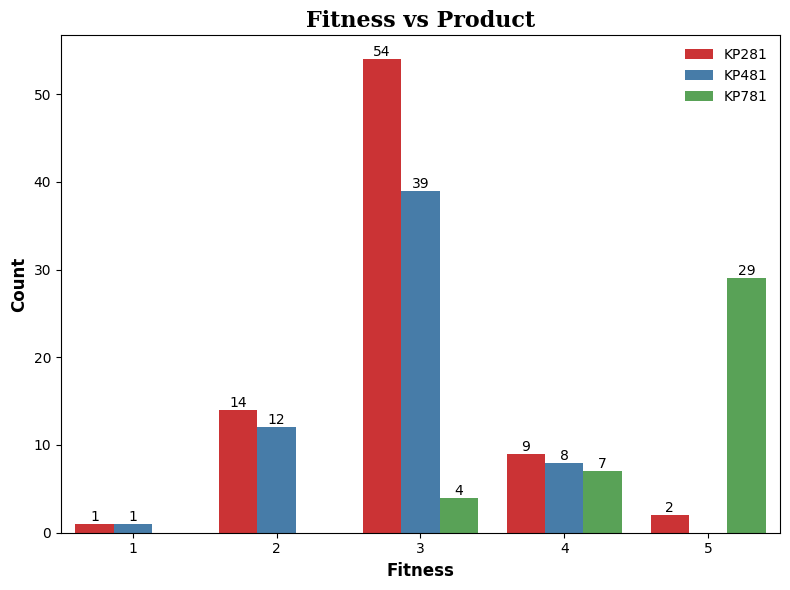

In [16]:
count_plot(data=df, x='Fitness', hue='Product', title='Fitness vs Product', xlabel='Fitness', ylabel='Count')

In [17]:
df_value_count = df['Fitness'].value_counts(normalize=True).mul(100).round(2).sort_index().to_frame()
df_value_count.columns = ['Percentage']
df_value_count['Percentage'] = df_value_count['Percentage'].astype(str) + '%'
df_value_count

,Percentage
Fitness,
1,1.11%
2,14.44%
3,53.89%
4,13.33%
5,17.22%


---
# Insights
* 54% of customers rate themselves as a 3 on a 1-5 fitness scale. This suggests that the majority view their fitness as average or moderate. A rating of 3 typically indicates neither low nor high fitness, representing a balanced perception of one's physical condition.
* Customers who purchase the KP781 treadmill tend to perceive themselves as fitter compared to those who buy KP281 or KP481 models. This trend indicates that KP781 appeals to fitness-conscious individuals who may seek advanced features or higher performance levels from their treadmill.
* Customers who rate themselves 2 or below typically avoid the KP781 treadmill. This suggests that individuals with lower perceived fitness levels prefer other models, likely due to a perception that KP781 is too advanced or not suited for their current fitness capabilities.
---

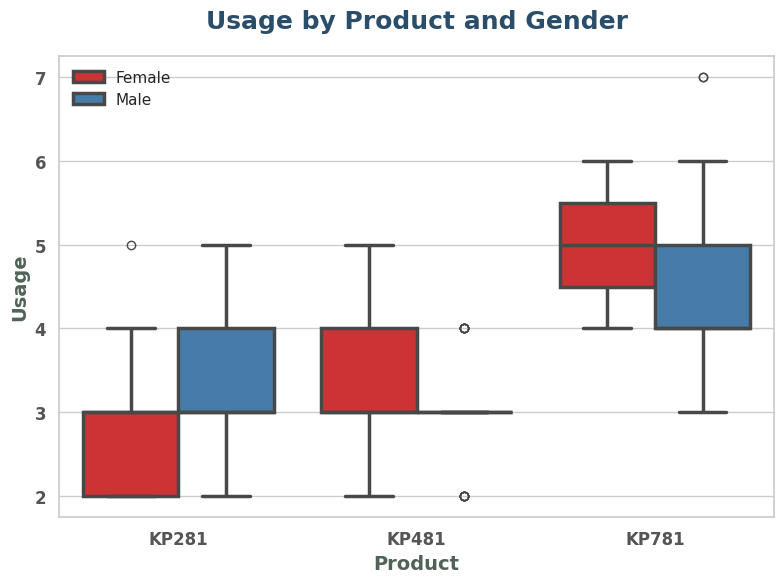

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger figure size and a theme
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")  # Applying a clean white grid theme

# Create the boxplot
sns.boxplot(x='Product', y='Usage', hue='Gender', data=df, palette='Set1', linewidth=2.5)

# Adding titles and customizing fonts
plt.title('Usage by Product and Gender', fontsize=18, fontweight='bold', color='#2A4D69', pad=20)
plt.xlabel('Product', fontsize=14, fontweight='bold', color='#4F6457')
plt.ylabel('Usage', fontsize=14, fontweight='bold', color='#4F6457')

# Customizing tick labels for better readability
plt.xticks(fontsize=12, fontweight='bold', color='#555555')
plt.yticks(fontsize=12, fontweight='bold', color='#555555')

# Adjust the legend for better presentation
plt.legend(loc='best', frameon=False)

# Display the plot with improved spacing
plt.tight_layout()
plt.show()


---
## Insight
* For the product KP281, male usage is significantly higher than female usage. The 25th percentile for males coincides with the 75th percentile for females, indicating much greater male usage.
* For the product KP481, male usage is lower, with the 25th, 50th, and 75th percentiles coinciding. There is a small outlier in male usage.
* For the product KP781, the 50th percentile of female usage coincides with the 75th percentile of male usage. However, the upper whiskers of both distributions match, suggesting greater variability in male usage, though the average usage is higher in females.
---

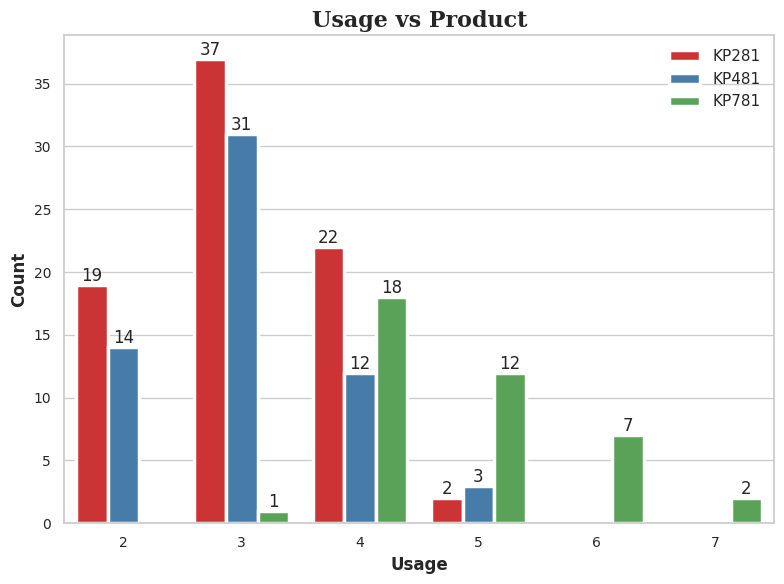

In [19]:
count_plot(data=df, x='Usage', hue='Product', title='Usage vs Product', xlabel='Usage', ylabel='Count')

---
## Insights:
* The majority of users use the treadmill 3 times a week.
* For the products KP281 and KP481, active users typically use them 2 to 4 times per week.
* The product KP781 has the longest usage per week compared to the other products.
---

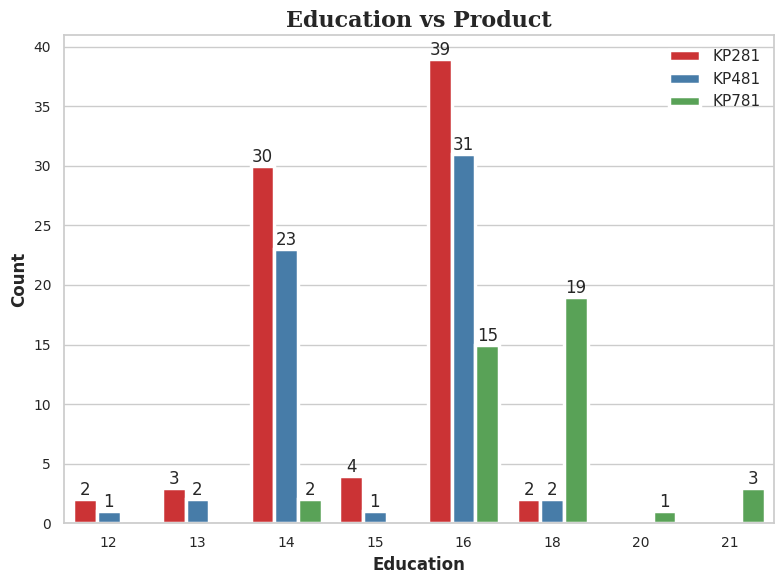

In [20]:
count_plot(data=df, x='Education', hue='Product', title='Education vs Product', xlabel='Education', ylabel='Count')

---
# Insights
* Individuals with 16 years of education purchased the most treadmills, followed by those with 14 years of education.
* Those with 18 years of education bought the highest number of KP781 treadmills.
* Customers with more than 18 years of education showed a clear preference for the KP781 model.
* People with less than 14 years of education generally avoided the KP781 treadmill.
---

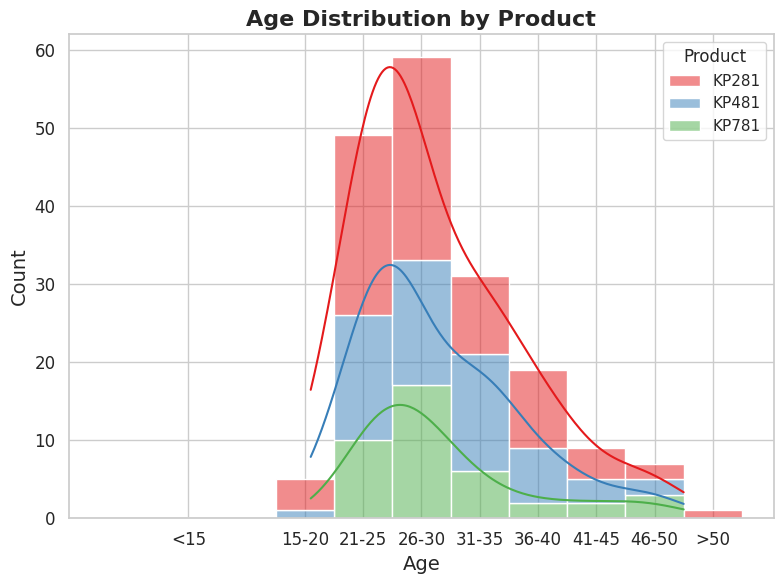

In [21]:
df_plot = df.copy()
# Define age bins and labels (adjusting the first bin to match the range of others)
bins = [0, 15, 20, 25, 30, 35, 40, 45, 50, 55]
labels = ['<15', '15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '>50']

# Create age group column in the DataFrame
df_plot['Age_Group'] = pd.cut(df_plot['Age'], bins=bins, labels=labels, right=False)

# Plotting the age distribution with product hue
plt.figure(figsize=(8, 6))
sns.histplot(x='Age', hue='Product', data=df_plot, palette='Set1', kde=True, bins=bins, multiple="stack")

# Add title and labels
plt.title('Age Distribution by Product', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set custom tick positions at the midpoint of each bin
bin_midpoints = [(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)]
plt.xticks(bin_midpoints, labels, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


---
## Insights
* Products are purchased by individuals older than 15 years.
* The majority of purchases come from the 21 to 35 age group.
* KP281 is the most popular product among most age groups.
---

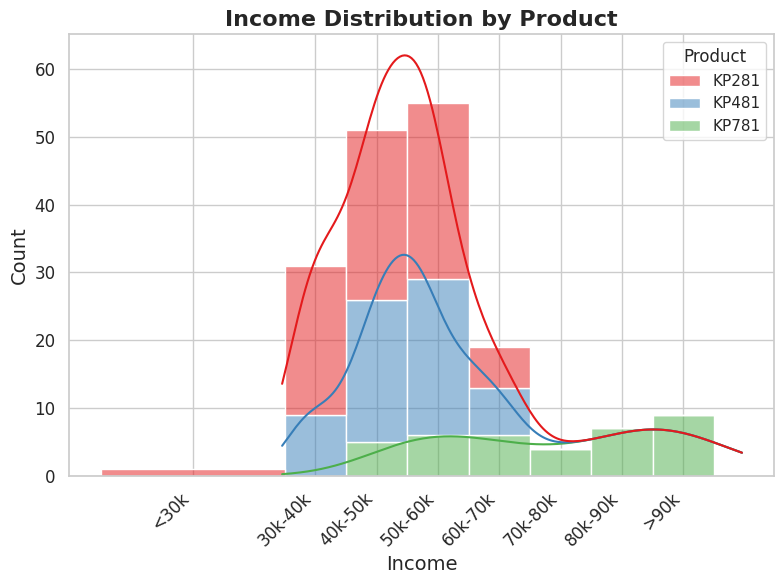

In [22]:
# Define income bins and labels
bins = [0, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
labels = ['<30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '>90k']

# Create income group column in the DataFrame
df_plot['Income_Group'] = pd.cut(df_plot['Income'], bins=bins, labels=labels, right=False)

# Plotting the income distribution with product hue
plt.figure(figsize=(8, 6))
sns.histplot(x='Income', hue='Product', data=df_plot, palette='Set1', kde=True, bins=bins, multiple="stack")

# Add title and labels
plt.title('Income Distribution by Product', fontsize=16, fontweight='bold')
plt.xlabel('Income', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set custom tick positions at the midpoint of each bin
bin_midpoints = [(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)]
plt.xticks(bin_midpoints, labels, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

---
## Insights
* The majority of customers who bought treadmills have an income between 40k and 60k.
* KP281 is the most popular product among most income groups.
* KP781 is a preferred product among individuals earning more than 60k.
---

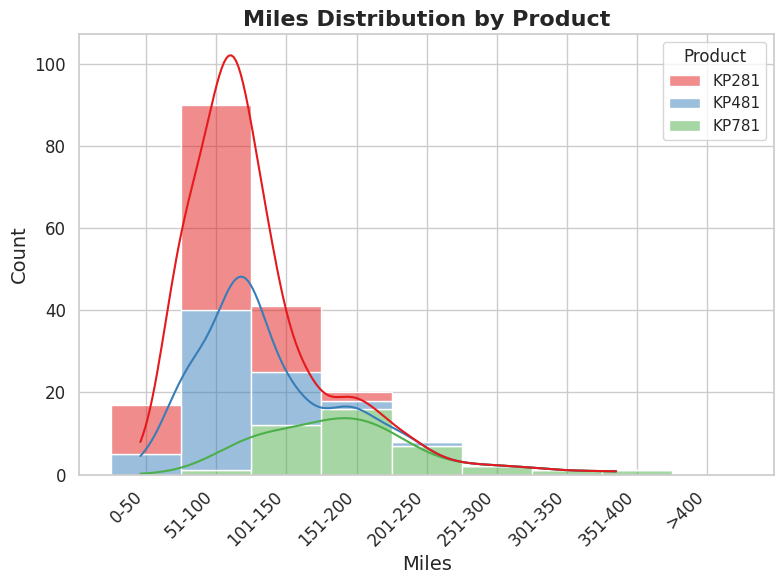

In [23]:
# Define miles bins and labels
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '>400']

# Create miles group column in the DataFrame
df_plot['Miles_Group'] = pd.cut(df_plot['Miles'], bins=bins, labels=labels, right=False)

# Plotting the miles distribution with product hue
plt.figure(figsize=(8, 6))
sns.histplot(x='Miles', hue='Product', data=df_plot, palette='Set1', kde=True, bins=bins, multiple="stack")

# Add title and labels
plt.title('Miles Distribution by Product', fontsize=16, fontweight='bold')
plt.xlabel('Miles', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set custom tick positions at the midpoint of each bin
bin_midpoints = [(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)]
plt.xticks(bin_midpoints, labels, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

---
## Insights
* The majority of customers who bought treadmills expect to run less than 150 miles.
* KP281 is the most popular product among most miles ranges.
* KP781 is a preferred product among individuals expecting to run more than 200 miles.
---


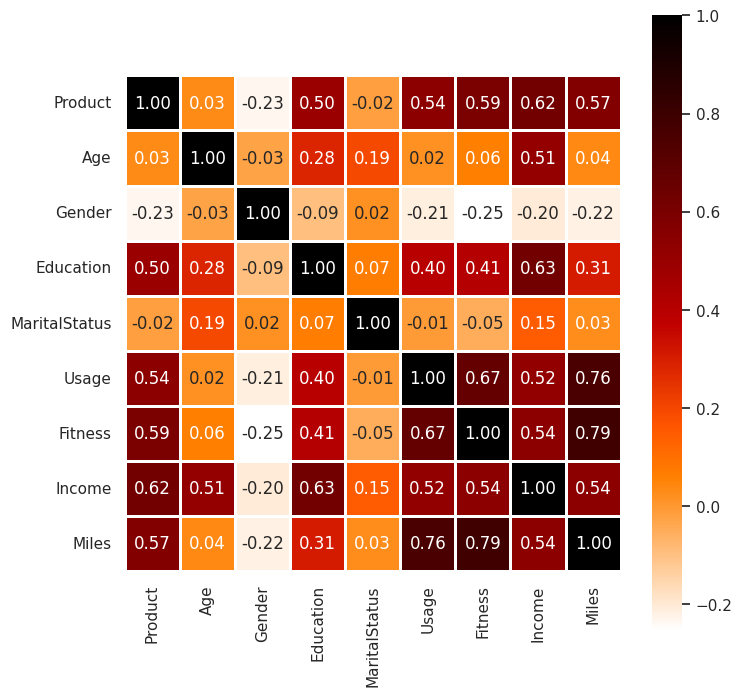

In [24]:
df_heatmap = df.copy()

df_heatmap['MaritalStatus'].replace(['Single', 'Partnered'], [0, 1], inplace=True)
df_heatmap['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
df_heatmap['Product'].replace(['KP281', 'KP481', 'KP781'], [0, 1, 2], inplace=True)
plt.figure(figsize=(8, 8))
sns.heatmap(df_heatmap.corr(), annot=True, fmt='.2f', cmap='gist_heat_r', square=True, cbar=True,edgecolors='white', linewidth=1)

plt.show()

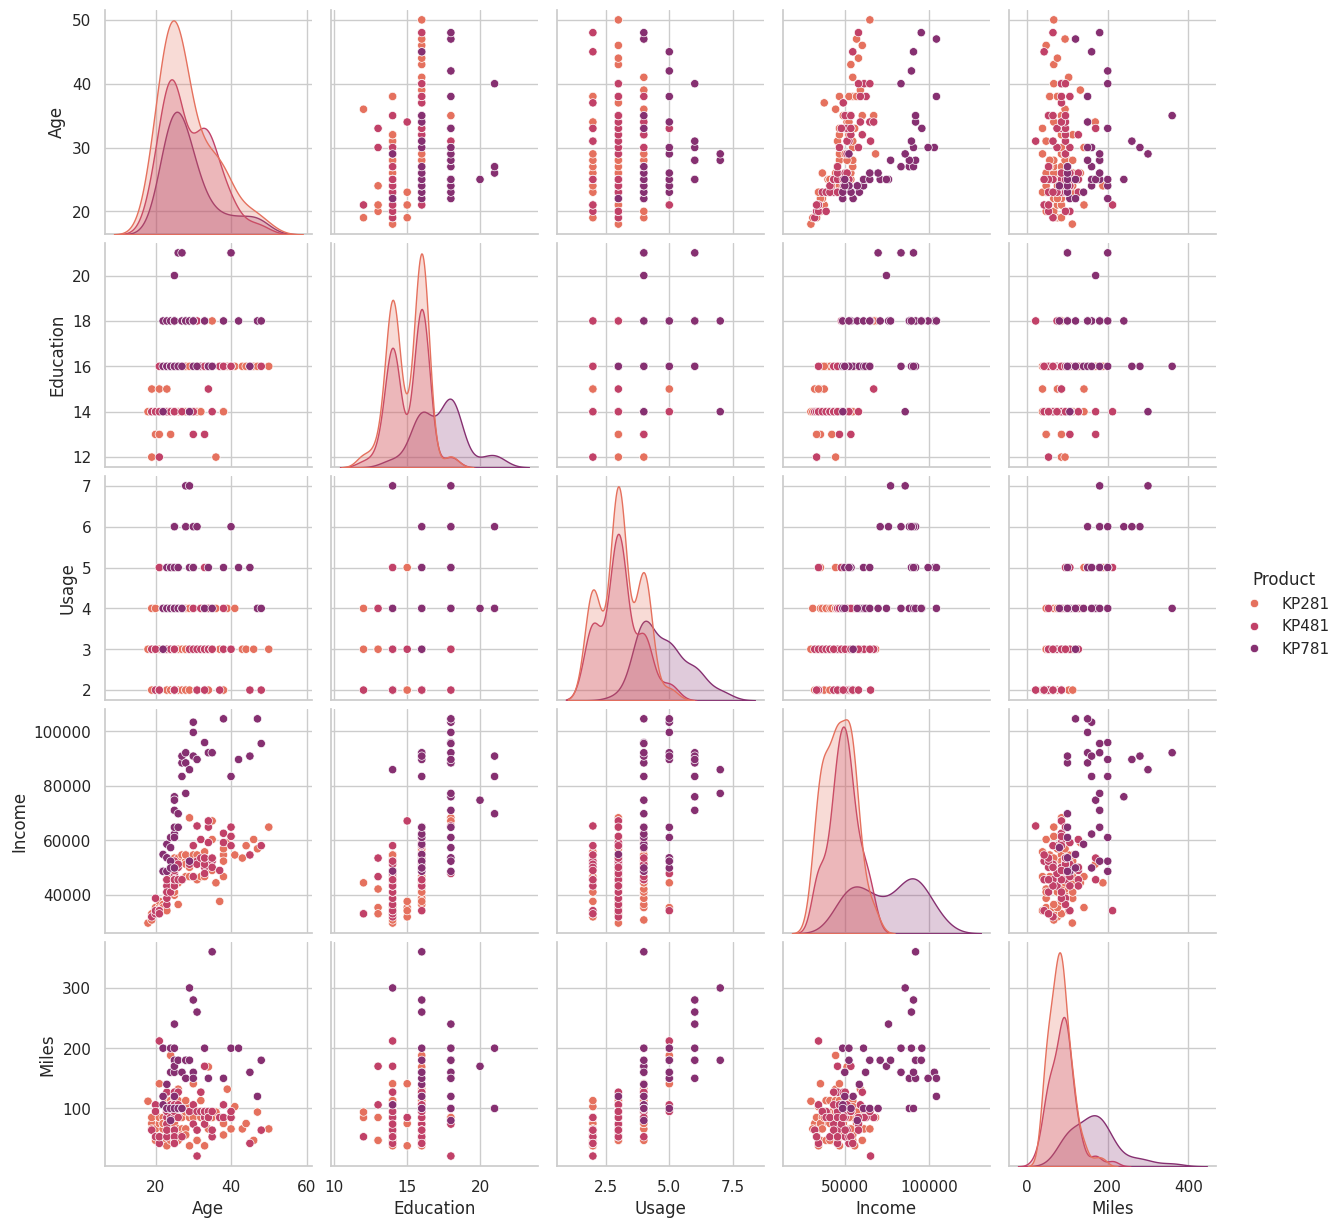

In [25]:
sns.pairplot(df, hue ='Product', palette= 'flare')
plt.show()

---
# Insights:
* Education is strongly correlated with income, which is expected, and it also influences product purchases. Additionally, education shows a significant correlation with fitness ratings and treadmill usage.

* Marital status exhibits a weaker correlation with both age and income.

* Usage is highly correlated with fitness levels and the distance covered, and it also has a stronger correlation with both income and education.

* Income demonstrates a strong correlation with product purchases and education, along with a notable correlation with age, usage, fitness, and miles run.

* From this analysis, we can conclude that product purchases are highly correlated with income, education, fitness, usage, and mileage.

* Moreover, age and education serve as indicators of income, which in turn affect the products purchased. Generally, as the sophistication of the product increases, so does its usage, leading to more miles run and consequently improving fitness ratings.
---

# Probability

In [37]:
df_prob = pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize=True).mul(100).round(2)
df_prob = df_prob.apply(lambda x: x.astype(str) + '%')
df_prob

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.22%,16.11%,3.89%,42.22%
Male,22.22%,17.22%,18.33%,57.78%
All,44.44%,33.33%,22.22%,100.0%


In [38]:
print('*'*50)
print()
print(f'Probability of P(Male) = {df_prob.loc["Male","All"]}')
print(f'Probability of P(Male|KP281) = {df_prob.loc["Male","KP281"]}')
print(f'Probability of P(Male|KP481) = {df_prob.loc["Male","KP481"]}')
print(f'Probability of P(Male|KP781) = {df_prob.loc["Male","KP781"]}')
print()
print('*'*50)
print()
print(f'Probability of P(Female) = {df_prob.loc["Female","All"]}')
print(f'Probability of P(Female|KP281) = {df_prob.loc["Female","KP281"]}')
print(f'Probability of P(Female|KP481) = {df_prob.loc["Female","KP481"]}')
print(f'Probability of P(Female|KP781) = {df_prob.loc["Female","KP781"]}')
print()
print('*'*50)

**************************************************

Probability of P(Male) = 57.78%
Probability of P(Male|KP281) = 22.22%
Probability of P(Male|KP481) = 17.22%
Probability of P(Male|KP781) = 18.33%

**************************************************

Probability of P(Female) = 42.22%
Probability of P(Female|KP281) = 22.22%
Probability of P(Female|KP481) = 16.11%
Probability of P(Female|KP781) = 3.89%

**************************************************


In [35]:
df_prob = pd.crosstab(index=df_plot['Age_Group'], columns=df_plot['Product'], margins=True, normalize=True).mul(100).round(2)
df_prob = df_prob.apply(lambda x: x.astype(str) + '%')
df_prob

Product,KP281,KP481,KP781,All
Age_Group,,,,
15-20,2.22%,0.56%,0.0%,2.78%
21-25,12.78%,8.89%,5.56%,27.22%
26-30,14.44%,8.89%,9.44%,32.78%
31-35,5.56%,8.33%,3.33%,17.22%
36-40,5.56%,3.89%,1.11%,10.56%
41-45,2.22%,1.67%,1.11%,5.0%
46-50,1.11%,1.11%,1.67%,3.89%
>50,0.56%,0.0%,0.0%,0.56%
All,44.44%,33.33%,22.22%,100.0%


In [39]:
df_prob = pd.crosstab(index=df['MaritalStatus'], columns=df['Product'], margins=True, normalize=True).mul(100).round(2)
df_prob = df_prob.apply(lambda x: x.astype(str) + '%')
df_prob

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,26.67%,20.0%,12.78%,59.44%
Single,17.78%,13.33%,9.44%,40.56%
All,44.44%,33.33%,22.22%,100.0%


In [40]:
print('*'*50)
print()
print(f'Probability of P(Single) = {df_prob.loc["Single","All"]}')
print(f'Probability of P(Single|KP281) = {df_prob.loc["Single","KP281"]}')
print(f'Probability of P(Single|KP481) = {df_prob.loc["Single","KP481"]}')
print(f'Probability of P(Single|KP781) = {df_prob.loc["Single","KP781"]}')
print()
print('*'*50)
print()
print(f'Probability of P(Partnered) = {df_prob.loc["Partnered","All"]}')
print(f'Probability of P(Partnered|KP281) = {df_prob.loc["Partnered","KP281"]}')
print(f'Probability of P(Partnered|KP481) = {df_prob.loc["Partnered","KP481"]}')
print(f'Probability of P(Partnered|KP781) = {df_prob.loc["Partnered","KP781"]}')
print()
print('*'*50)

**************************************************

Probability of P(Single) = 40.56%
Probability of P(Single|KP281) = 17.78%
Probability of P(Single|KP481) = 13.33%
Probability of P(Single|KP781) = 9.44%

**************************************************

Probability of P(Partnered) = 59.44%
Probability of P(Partnered|KP281) = 26.67%
Probability of P(Partnered|KP481) = 20.0%
Probability of P(Partnered|KP781) = 12.78%

**************************************************


In [41]:
df_prob = pd.crosstab(index=df['Usage'], columns=df['Product'], margins=True, normalize=True).mul(100).round(2)
df_prob = df_prob.apply(lambda x: x.astype(str) + '%')
df_prob

Product,KP281,KP481,KP781,All
Usage,,,,
2,10.56%,7.78%,0.0%,18.33%
3,20.56%,17.22%,0.56%,38.33%
4,12.22%,6.67%,10.0%,28.89%
5,1.11%,1.67%,6.67%,9.44%
6,0.0%,0.0%,3.89%,3.89%
7,0.0%,0.0%,1.11%,1.11%
All,44.44%,33.33%,22.22%,100.0%


In [42]:
df_prob = pd.crosstab(index=df['Fitness'], columns=df['Product'], margins=True, normalize=True).mul(100).round(2)
df_prob = df_prob.apply(lambda x: x.astype(str) + '%')
df_prob

Product,KP281,KP481,KP781,All
Fitness,,,,
1,0.56%,0.56%,0.0%,1.11%
2,7.78%,6.67%,0.0%,14.44%
3,30.0%,21.67%,2.22%,53.89%
4,5.0%,4.44%,3.89%,13.33%
5,1.11%,0.0%,16.11%,17.22%
All,44.44%,33.33%,22.22%,100.0%


In [43]:
df_prob = pd.crosstab(index=df_plot['Income_Group'], columns=df['Product'], margins=True, normalize=True).mul(100).round(2)
df_prob = df_prob.apply(lambda x: x.astype(str) + '%')
df_prob

Product,KP281,KP481,KP781,All
Income_Group,,,,
<30k,0.56%,0.0%,0.0%,0.56%
30k-40k,12.43%,5.08%,0.0%,17.51%
40k-50k,14.12%,11.86%,2.82%,28.81%
50k-60k,14.69%,12.99%,3.39%,31.07%
60k-70k,3.39%,3.95%,3.39%,10.73%
70k-80k,0.0%,0.0%,2.26%,2.26%
80k-90k,0.0%,0.0%,3.95%,3.95%
>90k,0.0%,0.0%,5.08%,5.08%
All,45.2%,33.9%,20.9%,100.0%


In [46]:
df_prob = pd.crosstab(index=df_plot['Miles_Group'], columns=df['Product'], margins=True, normalize=True).mul(100).round(2)
df_prob = df_prob.apply(lambda x: x.astype(str) + '%')
df_prob

Product,KP281,KP481,KP781,All
Miles_Group,,,,
0-50,6.67%,2.78%,0.0%,9.44%
51-100,27.78%,21.67%,0.56%,50.0%
101-150,8.89%,7.22%,6.67%,22.78%
151-200,1.11%,1.11%,8.89%,11.11%
201-250,0.0%,0.56%,3.89%,4.44%
251-300,0.0%,0.0%,1.11%,1.11%
301-350,0.0%,0.0%,0.56%,0.56%
351-400,0.0%,0.0%,0.56%,0.56%
All,44.44%,33.33%,22.22%,100.0%


# Customer Profiling for 3 Products

# KP281:
**Demographics:**
  - Most popular among a wide range of ages (21-35 being the highest), incomes (40k-60k), and education levels (16 years being the highest).
  - Slightly preferred by males.
  - Bought by both partnered and single individuals.

**Lifestyle/Fitness:**
  - Average fitness levels (fitness rating of 3).
  - Moderate treadmill usage (2-4 times a week).
  - Expect to run less than 150 miles.

**Summary:**
  KP281 seems to be the most mainstream product, appealing to a broad range of customers who are moderately active and have average fitness levels.


# KP481:
**Demographics:**
  - Appealing to a similar age, income, and education group as KP281.
  - Male usage is slightly lower than KP281.
  - Bought by both partnered and single individuals.

**Lifestyle/Fitness:**
  - Average fitness levels.
  - Usage is relatively consistent with slight outliers.
  - Expect to run less than 150 miles.

**Summary:**
  KP481 targets a similar customer base as KP281, slightly favoring those with moderate usage and fitness levels. It's more affordable than KP781


# KP781:
**Demographics:**
  - Preferred by individuals with higher education (18+ years), income (60k+), and miles expectations (200+).
  - More popular among males.
  - Partnered individuals have higher preference for it.

**Lifestyle/Fitness:**
  - Appeals to fitness-conscious individuals with higher perceived fitness levels.
  - Used more frequently (longer usage per week).
  - High mileage expectation.

**Summary:**
  KP781 is a high-end product appealing to a more focused segment of customers who are serious about fitness, with a higher budget and greater mileage needs. It's typically favored by males and partnered individuals.


## Insights

**Product vs Gender:**

* The products KP281 and KP481 are fairly equally chosen by both genders.
* The product KP781 is highly preferred by males compared to females.


**Product vs Marital Status:**

* Partnered/Married people purchased more treadmills compared to single people.


**Fitness vs Product:**

* 54% of customers rate themselves as a 3 on a 1-5 fitness scale, suggesting average fitness.
* Customers who purchase the KP781 treadmill tend to perceive themselves as fitter.
* Customers who rate themselves 2 or below typically avoid the KP781 treadmill.


**Usage by Product and Gender:**

* For KP281, male usage is significantly higher than female usage.
* For KP481, male usage is lower, with a small outlier.
* For KP781, female usage has higher average usage than male.


**Usage vs Product:**

* The majority of users use the treadmill 3 times a week.
* For KP281 and KP481, active users typically use them 2 to 4 times per week.
* KP781 has the longest usage per week.


**Education vs Product:**

* Individuals with 16 years of education purchased the most treadmills.
* Those with 18 years of education bought the highest number of KP781 treadmills.
* Customers with more than 18 years of education prefer KP781.
* People with less than 14 years of education generally avoided KP781.


**Age Distribution by Product:**

* Products are purchased by individuals older than 15 years.
* The majority of purchases come from the 21 to 35 age group.
* KP281 is the most popular product among most age groups.


**Income Distribution by Product:**

* The majority of customers who bought treadmills have an income between 40k and 60k.
* KP281 is the most popular product among most income groups.
* KP781 is a preferred product among individuals earning more than 60k.


**Miles Distribution by Product:**

* The majority of customers who bought treadmills expect to run less than 150 miles.
* KP281 is the most popular product among most miles ranges.
* KP781 is a preferred product among individuals expecting to run more than 200 miles.


**Correlation Analysis:**

* Education is strongly correlated with income, fitness, and usage.
* Marital status has a weaker correlation with age and income.
* Usage is highly correlated with fitness and miles.
* Income correlates with product purchases, education, age, usage, fitness, and miles.
* Product purchases are highly correlated with income, education, fitness, usage, and mileage.
* Age and education serve as indicators of income, which affects products purchased.


**Customer Profiling:**

**KP281:**
* Mainstream product appealing to a broad range of customers with moderate activity levels and average fitness.
* Preferred by wide range of ages, incomes, and education levels.

**KP481:**
* Targets similar customers as KP281, but with slightly more moderate usage and fitness.
* More affordable than KP781.

**KP781:**
* High-end product preferred by fitness-conscious individuals with higher budgets and mileage needs.
* More popular among males, partnered individuals, and those with higher education and income.

# Recommendations

1. Targeted Marketing Campaigns:
  - **KP781:** Focus marketing efforts on fitness enthusiasts, high-income earners, and individuals with higher education levels. Utilize channels like fitness magazines, online fitness communities, and social media platforms frequented by these demographics.
  - **KP281 & KP481:**  Target broader audiences through general advertising, promotions, and collaborations with retail partners. Focus on affordability and versatility, appealing to a wide range of age groups and income levels.


 2. Product Development and Enhancements:
  - **KP781:** Introduce advanced features and functionalities based on user needs. Consider options like heart rate monitoring, integrated entertainment systems, and personalized workout programs.
  - **KP281 & KP481:** Explore ways to enhance user experience with features that are budget-friendly and cater to a wider audience, such as improved console display, streamlined controls, and different workout preset options.


 3. Customer Segmentation and Personalization:
  - Develop targeted marketing campaigns based on customer profiles (age, income, education, fitness level, etc.).
  - Utilize data to personalize recommendations and offers for specific user segments.
  - Consider creating loyalty programs and incentives to foster customer retention and repeat purchases.


 4. Pricing and Promotion Strategies:
  - **KP281 & KP481:** Offer attractive promotions and bundles to make products more appealing to budget-conscious customers.
  - **KP781:** Justify the premium price point by highlighting the advanced features and high-performance aspects. Offer financing options or exclusive packages to entice high-income buyers.


 5. Website and App Enhancements:
  - Include detailed product descriptions, features, and customer reviews on the website to enhance user understanding.
  - Develop a user-friendly app for product control, tracking workouts, and monitoring progress.
  - Create an online community or forum for customers to connect, share experiences, and contribute ideas.


 6. Monitor Usage Data and Feedback:
  - Continuously monitor product usage data, user feedback, and customer reviews to identify areas for improvement and future product development.
  - Implement a feedback mechanism to collect information on product satisfaction, user experience, and areas needing enhancement.


 7. Focus on Improving Fitness and Usage:
  - Offer resources and content for enhancing fitness levels, including workout plans, nutrition guidance, and advice on proper treadmill usage.
  - Conduct targeted campaigns that emphasize the importance of exercise and promote healthy lifestyle habits.


 8. Address KP781 Adoption:
  - Design specific marketing materials to target individuals with higher perceived fitness levels, showcasing the features and benefits that appeal to them.
  - Explore options to offer introductory or trial periods for the KP781 to encourage adoption by users who might initially perceive it as too advanced.


In [47]:
# END